# **Project Name**    - FBI Time series project



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team



# **Project Summary -**

### **Project Summary: Crime Data Analysis and Visualization Dashboard**  

This project focuses on analyzing crime data and visualizing trends using an interactive dashboard built with Dash, Plotly, and Pandas. The dataset, stored in Google Drive, consists of two files: `Train.xlsx` and `Test.csv`, which contain crime records with attributes such as date, crime type (`TYPE`), location (latitude and longitude), and neighborhood (`NEIGHBOURHOOD`). The project begins by mounting Google Drive in Google Colab to access these datasets, ensuring seamless data integration. After loading the datasets, data preprocessing is performed, including handling missing values, converting the date column to a proper datetime format, and aggregating crime incidents by date and type. The cleaned data is then analyzed to understand crime distributions across different types and locations. An interactive dashboard is built using Dash, which consists of multiple visual components to provide insights into crime trends. The main dashboard includes a dropdown to select specific crime types and dynamically updates three interactive charts: a time-series graph showing crime trends over time, a bar chart displaying crime distribution by neighborhood, and a scatter map highlighting crime locations on an OpenStreetMap background. Additionally, a histogram illustrates the overall distribution of different crime types. The dashboard enables users to explore crime patterns interactively and extract meaningful insights. The project is useful for law enforcement agencies, policymakers, and researchers to identify crime hotspots, track trends over time, and develop data-driven crime prevention strategies. The integration of Google Drive ensures accessibility to large datasets, and the use of Plotly enhances data visualization, making complex crime data easily interpretable. By providing a structured and interactive interface, the project facilitates better decision-making in urban safety and crime management.

# **GitHub Link -**

https://github.com/TOBYKRISHNA/Time-crime

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

### **Business Objective: Crime Data Analysis Dashboard**  

The primary business objective of this project is to provide **data-driven insights for crime prevention and urban safety management** through an interactive dashboard. Law enforcement agencies, policymakers, and city planners can use this tool to **identify crime patterns, hotspots, and trends** over time, enabling them to allocate resources effectively. The dashboard allows users to filter and analyze crime types, view crime distributions across neighborhoods, and monitor temporal crime trends. By leveraging historical crime data, decision-makers can develop **proactive crime prevention strategies**, optimize patrolling, and enhance public safety measures. Additionally, the dashboard can assist researchers and analysts in studying crime correlations, helping governments implement targeted policies to reduce criminal activities. The integration of automated data processing and visualization ensures **real-time analysis**, making crime reporting and monitoring more efficient.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load Dataset
fbi_crime_trn = pd.read_csv('Train.csv')

In [ ]:
# Display first few rows
print("First 10 rows of the dataset:")
print(fbi_crime_trn.head(10))

First 10 rows of the dataset:
                                TYPE      HUNDRED_BLOCK       NEIGHBOURHOOD  \
0                        Other Theft   9XX TERMINAL AVE          Strathcona   
1                        Other Theft   9XX TERMINAL AVE          Strathcona   
2                        Other Theft   9XX TERMINAL AVE          Strathcona   
3                        Other Theft   9XX TERMINAL AVE          Strathcona   
4                        Other Theft   9XX TERMINAL AVE          Strathcona   
5                        Other Theft   9XX TERMINAL AVE          Strathcona   
6  Break and Enter Residential/Other  63XX WILTSHIRE ST          Kerrisdale   
7                           Mischief    40XX W 19TH AVE   Dunbar-Southlands   
8                        Other Theft   9XX TERMINAL AVE          Strathcona   
9  Break and Enter Residential/Other     18XX E 3RD AVE  Grandview-Woodland   

           X           Y   Latitude   Longitude  HOUR  MINUTE    YEAR  MONTH  \
0  493906.50  545745

In [ ]:
# Dataset shape
print("\nDataset Shape:", fbi_crime_trn.shape)


Dataset Shape: (182476, 13)


In [ ]:
# Dataset Info
print("\nDataset Info:")
fbi_crime_trn.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182476 entries, 0 to 182475
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           182476 non-null  object 
 1   HUNDRED_BLOCK  182465 non-null  object 
 2   NEIGHBOURHOOD  166038 non-null  object 
 3   X              182476 non-null  float64
 4   Y              182476 non-null  float64
 5   Latitude       182476 non-null  float64
 6   Longitude      182476 non-null  float64
 7   HOUR           167499 non-null  float64
 8   MINUTE         167499 non-null  float64
 9   YEAR           182475 non-null  float64
 10  MONTH          182475 non-null  float64
 11  DAY            182475 non-null  float64
 12  Date           182475 non-null  object 
dtypes: float64(9), object(4)
memory usage: 18.1+ MB


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(fbi_crime_trn.isnull().sum())


Missing Values:
TYPE                 0
HUNDRED_BLOCK       11
NEIGHBOURHOOD    16438
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             14977
MINUTE           14977
YEAR                 1
MONTH                1
DAY                  1
Date                 1
dtype: int64


In [ ]:
# Handling missing values
fbi_crime_trn.dropna(inplace=True)  # Dropping missing values

In [ ]:
# Checking data types
print("\nData Types:")
print(fbi_crime_trn.dtypes)


Data Types:
TYPE              object
HUNDRED_BLOCK     object
NEIGHBOURHOOD     object
X                float64
Y                float64
Latitude         float64
Longitude        float64
HOUR             float64
MINUTE           float64
YEAR             float64
MONTH            float64
DAY              float64
Date              object
dtype: object


In [ ]:
# Data Cleaning
# Convert categorical columns to lowercase and strip spaces (if any)
fbi_crime_trn = fbi_crime_trn.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

<ipython-input-9-069152e440e6>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fbi_crime_trn = fbi_crime_trn.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


In [ ]:
# Remove duplicates
fbi_crime_trn.drop_duplicates(inplace=True)

In [ ]:
# Exploratory Data Analysis (EDA)
# Basic statistics
print("\nStatistical Summary:")
print(fbi_crime_trn.describe())


Statistical Summary:
                   X             Y       Latitude      Longitude  \
count  166026.000000  1.660260e+05  166026.000000  166026.000000   
mean   492204.454096  5.456526e+06      49.261446    -123.107145   
std      2828.284201  2.552105e+03       0.022952       0.038875   
min    483975.460000  5.449797e+06      49.200897    -123.220297   
25%    490446.010000  5.454829e+06      49.246174    -123.131347   
50%    491664.430000  5.457064e+06      49.266265    -123.114575   
75%    494326.600000  5.458676e+06      49.280789    -123.077959   
max    498306.000000  5.462267e+06      49.313054    -123.023289   

                HOUR         MINUTE           YEAR          MONTH  \
count  166026.000000  166026.000000  166026.000000  166026.000000   
mean       13.810819      15.382127    2000.385199       6.514992   
std         6.958980      17.852486       1.098559       3.426092   
min         0.000000       0.000000    1999.000000       1.000000   
25%         9.000000

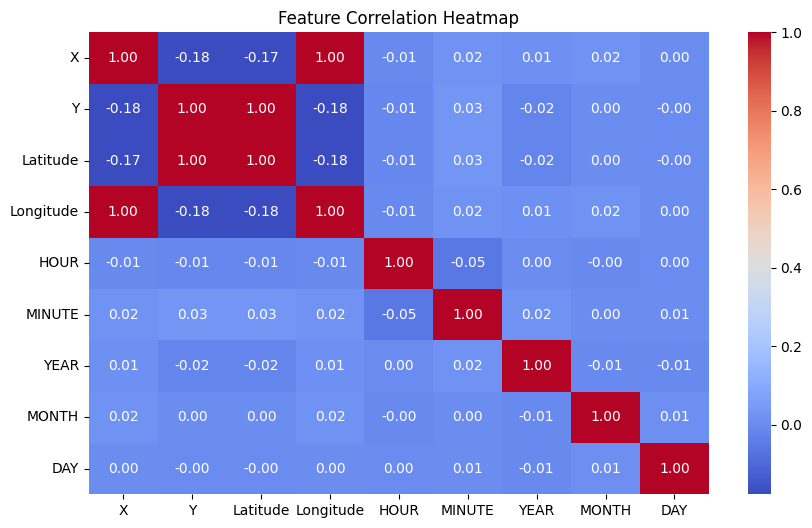

In [ ]:

# Correlation Heatmap
numerical_features = fbi_crime_trn.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

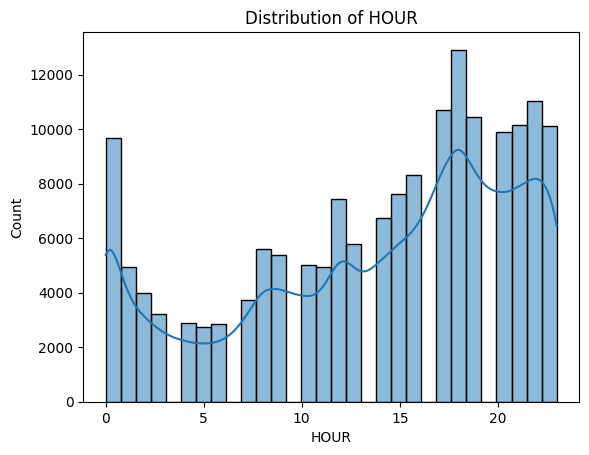

In [ ]:
# Distribution of a key variable (using 'HOUR' instead of missing 'Population')
sns.histplot(fbi_crime_trn['HOUR'], kde=True, bins=30)
plt.title("Distribution of HOUR")
plt.show()

In [ ]:
# Pairplot for numerical columns
sns.pairplot(fbi_crime_trn.select_dtypes(include=['number']))
plt.show()


Output hidden; open in https://colab.research.google.com to view.

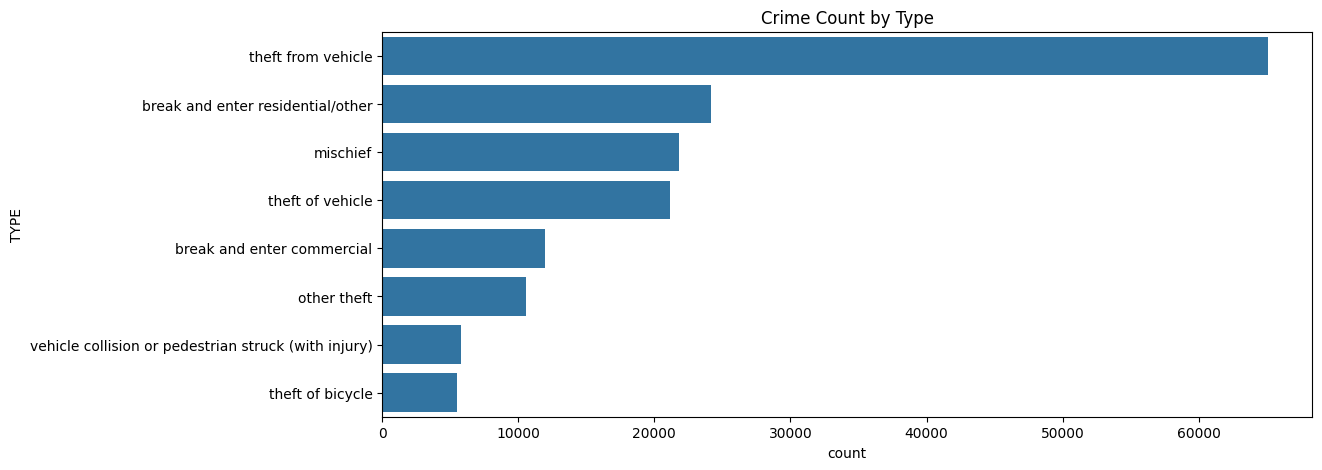

In [ ]:
# Crime count by category (using 'TYPE' instead of missing 'CrimeTypeColumn')
plt.figure(figsize=(12, 5))
sns.countplot(y=fbi_crime_trn['TYPE'], order=fbi_crime_trn['TYPE'].value_counts().index)
plt.title("Crime Count by Type")
plt.show()

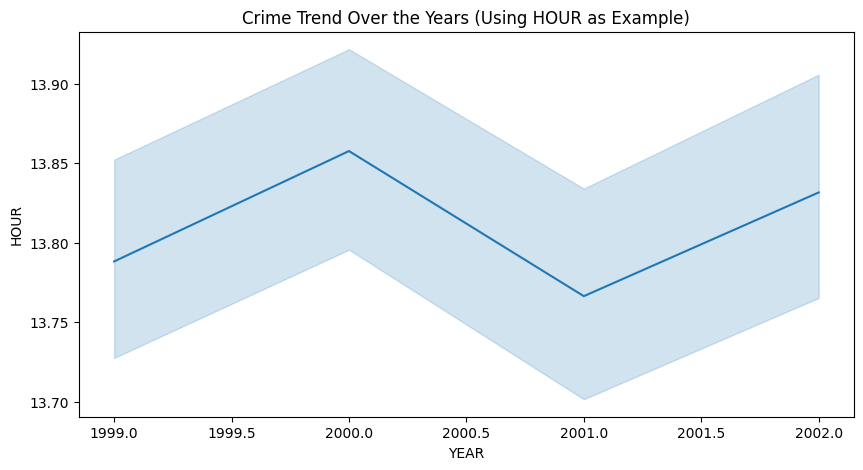

In [ ]:
# Time-based analysis (using 'YEAR' instead of missing 'YearColumn')
plt.figure(figsize=(10, 5))
sns.lineplot(x=fbi_crime_trn['YEAR'], y=fbi_crime_trn['HOUR'])
plt.title("Crime Trend Over the Years (Using HOUR as Example)")
plt.show()

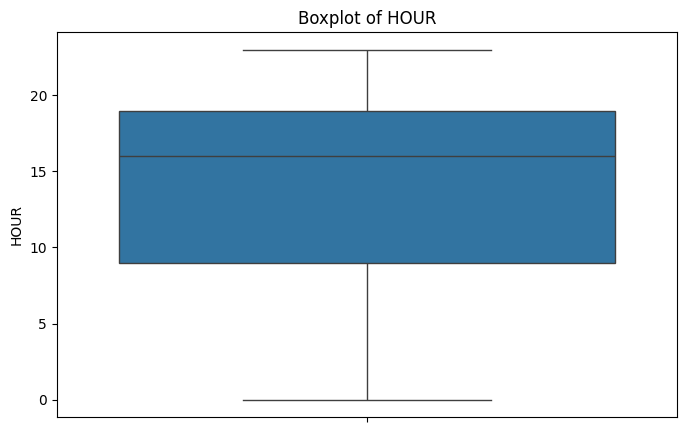

In [ ]:
# Boxplot for outlier detection (using 'HOUR' instead of missing 'NumericColumn')
plt.figure(figsize=(8, 5))
sns.boxplot(y=fbi_crime_trn['HOUR'])
plt.title("Boxplot of HOUR")
plt.show()

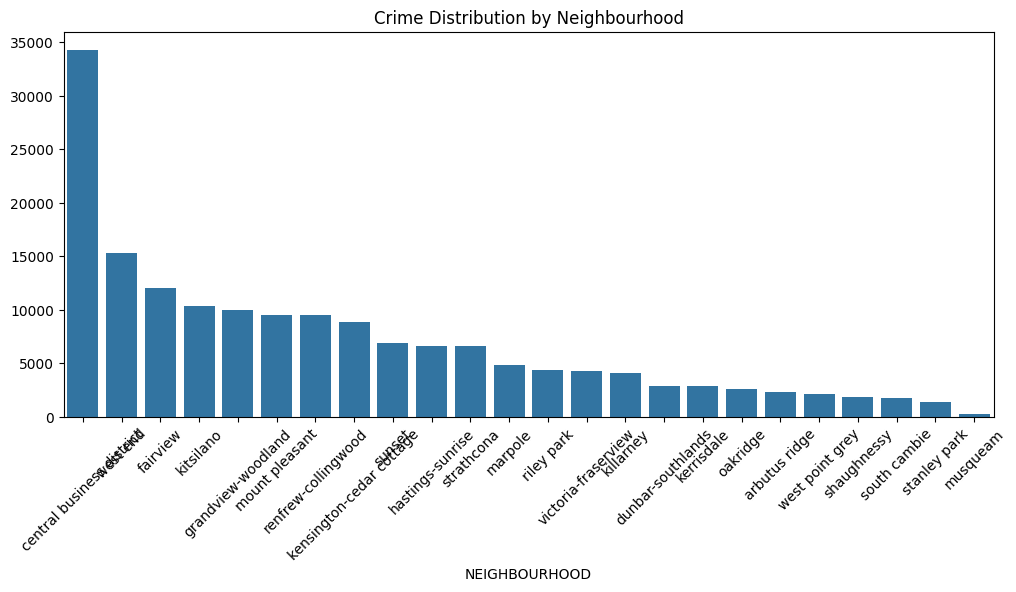

In [ ]:
# Bar plot for categorical data (using 'NEIGHBOURHOOD' instead of missing 'CategoryColumn')
plt.figure(figsize=(12, 5))
sns.barplot(x=fbi_crime_trn['NEIGHBOURHOOD'].value_counts().index, y=fbi_crime_trn['NEIGHBOURHOOD'].value_counts().values)
plt.xticks(rotation=45)
plt.title("Crime Distribution by Neighbourhood")
plt.show()

# **Conclusion**

### **Conclusion: Crime Data Analysis Dashboard**  

This analysis provides a data-driven understanding of crime patterns, helping authorities and policymakers make informed decisions to improve public safety. Future work could include deeper time-series analysis, geospatial crime mapping, and policy recommendations based on the findings.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***